# IMPORT LIBS

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# GENERATE DATA

In [4]:
# Generate example data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

# DECOMPOSITION

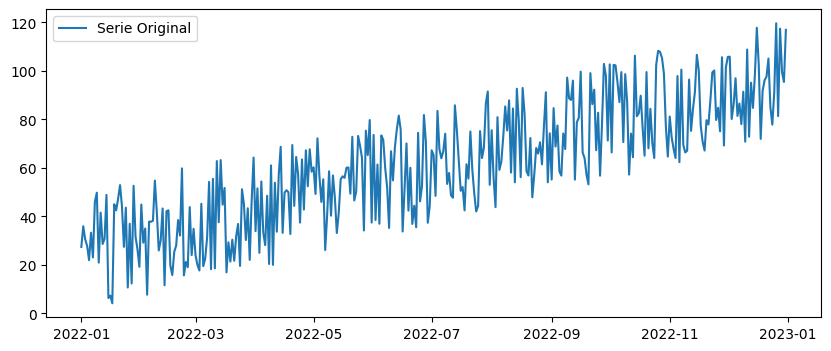

In [5]:
# Original series graphic
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

In [6]:
# Time series decomposition
decomposition = seasonal_decompose(ts, model='additive')

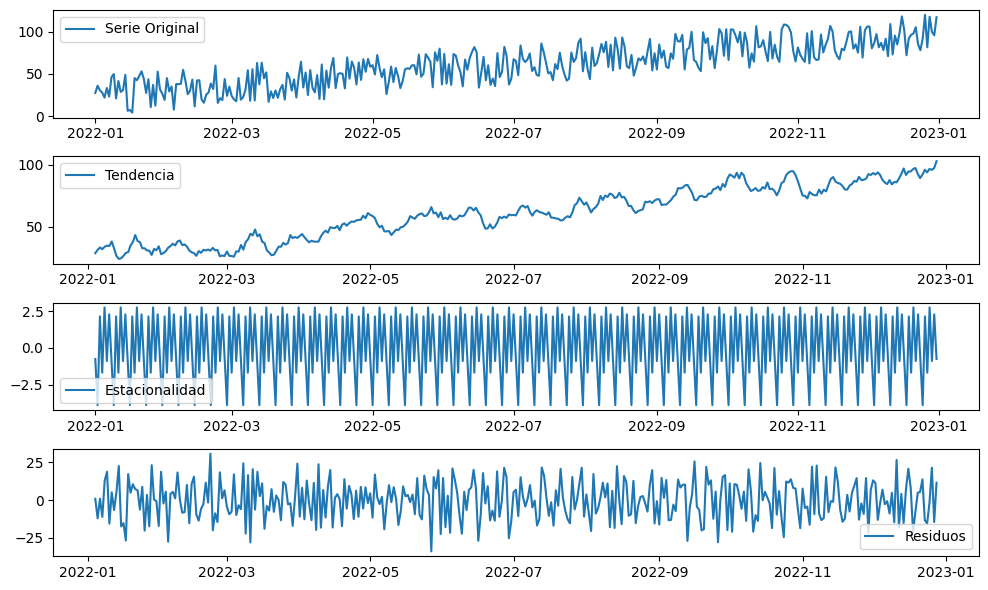

In [7]:
# Original series graphic
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

# Tendence graphic
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

# Seasonality graphic
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

# Resid graphic
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# SEASONAL DECOMPOSITION EXERCISE

Objetivo: Aplicar la técnica de descomposicion estacional a un conjunto de datos de series de tiempo.

Instrucciones:
- Los estudiantes deben buscar en línea un dataset que contenga
una serie de tiempo.
- Pueden explorar sitios como Kaggle, UCI Machine Learning Repository, o cualquier otra fuente confiable de datasets.
- Descargar y cargar el dataset en un entorno de programación como Jupyter Notebook o Google Colab.
- Utilizar las bibliotecas de Python (pandas, numpy, matplotlib, statsmodels) para realizar la descomposición estacional de la serie de tiempo.
- Visualizar gráficamente la serie de tiempo original, la tendencia, la estacionalidad y los residuos.
- Realizar un análisis e interpretación de los resultados obtenidos después de la descomposición.

Preguntas
- ¿Qué tipo de serie de tiempo encontraron en el dataset?
- ¿Cuál es la tendencia general de la serie de tiempo?
- ¿Existen patrones estacionales evidentes en los datos?
- ¿Qué información aporta la descomposición estacional sobre la serie de tiempo?
- ¿Cómo pueden aplicar estos resultados en un contexto real o en un análisis más profundo?

# PRONOSTIC

In [8]:
# Splitting the training and test data
train_data = ts[:'2022-10-01']
test_data = ts['2022-10-02':]

In [9]:
# Adjust ARIMA model
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

c:\Users\Lenovo\Documents\Talento Tech\IA\TalentoTECH-Repo\Temp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Realize pronostic
forecast = model_fit.forecast(steps=len(test_data))

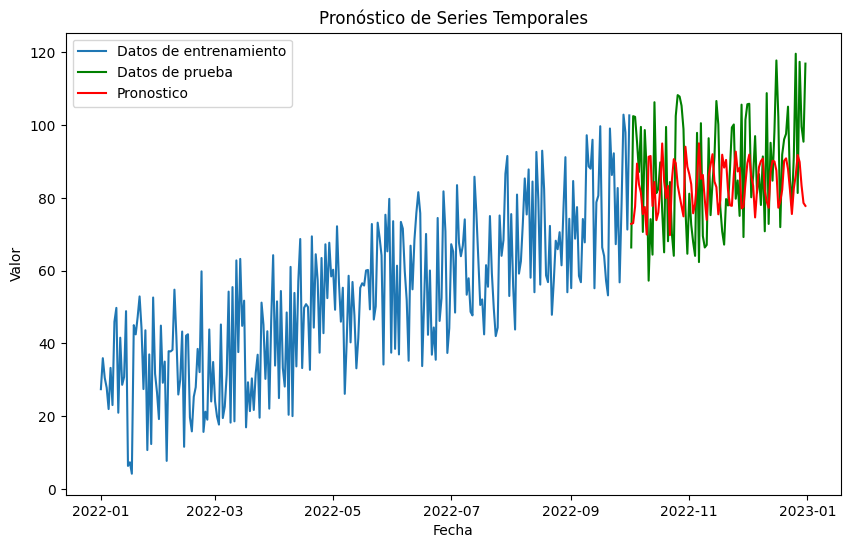

In [11]:
# Graph of the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Datos de entrenamiento')
plt.plot(test_data, label='Datos de prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronostico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# VALIDATION

In [14]:
# Generate example data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

In [15]:
# Split the training and test data
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

In [16]:
# Adjust ARIMA model
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

c:\Users\Lenovo\Documents\Talento Tech\IA\TalentoTECH-Repo\Temp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
# Realize pronostic
forecast = model_fit.forecast(steps=len(test_data))

In [18]:
# Calculate mean absolute error
mae = mean_absolute_error(test_data, forecast)

print("Error Absoluto Medio (MAE): ", mae)

Error Absoluto Medio (MAE):  13.257016753140691


# VALIDATION EXERCISE
Objetivo: Los estudiantes deben buscar y descargar un dataset, aplicar
un modelo de pronóstico de serie de tiempo y calcular las métricas de
evaluación como el error cuadrático medio (MSE) y el error absoluto
medio (MAE):

- Búsqueda de Dataset.
- Descarga y Preprocesamiento.
- División de Datos.
- Modelado y Pronóstico.
- Evaluación del Modelo.
- Análisis y Conclusiones.